# Importations

In [1]:
%time

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


In [26]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import plotly.express

# Creating the model for Family

## Creating the DataFrames

In [3]:
#creating the dataframes

df_sales = pd.read_csv("gs://business-case/train.csv")
df_stores = pd.read_csv("gs://business-case/stores.csv")
sales_and_stores = pd.merge(df_sales, df_stores, on='store_nbr') #check if exists



In [4]:
#making it in the patter of
sales_and_stores = pd.read_parquet("../data_train_merge_stores.parquet").rename(columns={'date': 'ds', 'sales':'y'}).drop(columns=["month", "year", "city"])

In [5]:
sales_and_stores

,ds,store_nbr,family,y
0,2013-01-01,1,AUTOMOTIVE,0.000
1,2013-01-01,1,BABY CARE,0.000
2,2013-01-01,1,BEAUTY,0.000
3,2013-01-01,1,BEVERAGES,0.000
4,2013-01-01,1,BOOKS,0.000
...,...,...,...,...
2596369,2016-12-31,9,POULTRY,687.853
2596370,2016-12-31,9,PREPARED FOODS,100.405
2596371,2016-12-31,9,PRODUCE,3091.356
2596372,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000


## Defining the function for families

In [19]:
%%time
def family(sales_and_stores):
    
    forecasts = {}
    for category in sales_and_stores['family'].unique():
        print(category)
        # creating a new variable
        tmp_df_prep = sales_and_stores[sales_and_stores['family']== category]
        
        # Transforming the column in date time
        tmp_df_prep['ds'] = pd.to_datetime(tmp_df_prep['ds'])
 
        # creating a temporary df to the the training and prediction
        tmp_df = tmp_df_prep.groupby(by='ds').sum().drop(columns=["store_nbr"]).reset_index()
        
        
        # defining the train/test 
        train = tmp_df.iloc[:1457]
        test = tmp_df.iloc[1458:]
        
        
        # Instantiating the FB Prophet model
        model = Prophet(seasonality_mode='multiplicative', daily_seasonality=True)

        # fitting the model on the train test
        model.fit(train)
        
        forecasts[category]= model
    
    return forecasts

model_family = family(sales_and_stores)


AUTOMOTIVE


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


BABY CARE
Initial log joint probability = -33.4819
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3067.62     0.0105984        192.69           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3084.73   0.000129359       306.754      0.3713      0.3713      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3091.76    0.00231431       224.354      0.5797      0.5797      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3097.28    0.00587583       88.1352       1.023      0.2094      501   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3100.87    0.00169316       139.724      0.3717           1      631   
    Iter      log prob        ||dx||      ||grad||    

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3929.92     0.0212725        140.89           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3951.03      0.011007       2117.46           1           1      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3961.43    0.00436791       243.391           1           1      374   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3971.16    0.00431938       420.452           1           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3983.06    0.00143646       293.187           1           1      633   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


BEVERAGESInitial log joint probability = -10.5265

    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3573.83    0.00173866       403.959      0.6264      0.6264      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3583.62    0.00158886       134.044      0.2637           1      272   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3586.7   0.000106402       225.827      0.5581      0.5581      409   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332       3587.62   0.000111332       162.374   1.459e-07       0.001      495  LS failed, Hessian reset 
     399       3588.21   0.000325304       80.7215           1           1      581   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     459       3589.03   9.605

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.526
BOOKS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2735.48       0.01642       224.608           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2890.35     0.0497906        3433.6           1           1      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2923.98    0.00171901       149.958           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2944.09    0.00273731       368.533           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2955.72    0.00169665       532.264           1           1      609   
    Iter      log prob        ||dx||      ||grad||       al

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


BREAD/BAKERY
Initial log joint probability = -25.3123
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4119.34    0.00392039       206.249           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4135.56    0.00275693       104.608           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4141.31     0.0014358       1004.06      0.4637      0.4637      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4147.43     0.0265222       645.651           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     405        4147.5   0.000603219       638.017   5.914e-06       0.001      557  LS failed, Hessian reset 
     499       4152.81   0.

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3494.24     0.0388571       722.097           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3521.18     0.0096321       194.717      0.4021     0.04021      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3530.01     0.0154098       357.879       0.397           1      381   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3533.2   0.000287684       171.609           1           1      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3534.84    0.00030715       120.184      0.6262      0.6262      641   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     516     

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2706.51    0.00843855       493.844      0.9147      0.9147      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2840.18    0.00187217       989.929     0.07292      0.8461      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2884.86    0.00715474       947.877           1           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2924.99   0.000546853       817.324           1           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2936.44    0.00488418       1828.33      0.3316           1      601   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     581     

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


DAIRY
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2982.38    0.00237152       235.668      0.8444      0.8444      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2990.06     0.0211606       247.026           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     230       2991.48   0.000442524       188.757   5.454e-06       0.001      337  LS failed, Hessian reset 
     299       2991.74   0.000532191       89.2262           1           1      430   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       2991.97   0.000465908       200.123    6.04e-06       0.001      475  LS failed, Hessian reset 
     399       2992.87     0.0083694        204.61      0.7583      0.7583      578   
    Iter      log prob        ||dx||      ||grad||      

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


DELI
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3350.53     0.0510569       688.314           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3387.59    0.00102242       637.042      0.2732      0.2732      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3403.13    0.00405382       200.172           1           1      365   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     368       3411.39   4.99976e-05       283.621   2.683e-07       0.001      501  LS failed, Hessian reset 
     399       3412.61    0.00106087       187.982      0.3694           1      536   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3418.55    0.00357712       647.622           1           1  

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3197.84    0.00133929       233.183           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3216.22     0.0302112       658.184           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3223.51   0.000493593       198.103      0.6304      0.6304      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3226.83     0.0250176       324.558           1           1      498   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     422       3228.98   2.32047e-05        147.85   1.297e-07       0.001      584  LS failed, Hessian reset 
     499       3232.79    0.00074538       100.201           1           1      6

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


FROZEN FOODS
Initial log joint probability = -33.1692
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3434.33    0.00948981       660.837           1           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3441.92    0.00522026       216.845      0.2069           1      270   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3446.66    0.00299015       497.249      0.7141      0.7141      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3447.13   0.000539234       81.3851           1           1      524   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     474       3448.12   6.00564e-05       194.581   1.025e-07       0.001      675  LS failed, Hessian reset 
     499       3448.99   9.

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.0112
GROCERY I
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3678.9   0.000231831       113.527      0.5353      0.5353      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       3679.88   0.000228158       133.061    2.12e-06       0.001      193  LS failed, Hessian reset 
     199       3680.88   0.000412776       66.7604      0.8213      0.8213      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3681.35   0.000274777       95.2926           1           1      398   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3683.01   0.000156628       122.254           1           1      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3684.18   0.000

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


GROCERY II
Initial log joint probability = -18.4125
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3539.79    0.00462387           879      0.5982      0.5982      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3541.76   0.000123133       145.373   1.208e-06       0.001      301  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     258       3542.07    0.00033766       92.3211   5.023e-06       0.001      413  LS failed, Hessian reset 
     299       3542.18   0.000159743       81.2544           1           1      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3542.65   3.28611e-05       51.1829      0.5192      0.5192      590   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -103.685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3180.68    0.00974879       261.436      0.3472           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3191.04    0.00581368       285.804       2.747      0.2747      255   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3203.07    0.00552549       138.165           1           1      377   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     333       3205.64   0.000913713       106.704   5.103e-06       0.001      448  LS failed, Hessian reset 
     356        3206.9   0.000125274       115.277    6.37e-07       0.001      512  LS failed, Hessian reset 
     399       3207.95    0.00369637       210.814      0.9444      0.9444      563   
    Iter      log pro

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -42.1561
HOME AND KITCHEN I
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2709.79    0.00199489        92.649           1           1      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2722.06    0.00458901       253.057           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2730.55     0.0278205       619.927        3.29       0.329      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       2732.67   4.33385e-05        147.72   2.504e-07       0.001      462  LS failed, Hessian reset 
     399       2736.07   0.000979756       78.5991           1           1      549   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     470       2737.2

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -44.8428
HOME AND KITCHEN II
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3057.87    0.00216934       647.832      0.2453      0.2453      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3090.47    0.00667001       440.088           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3100.87    0.00471609       157.986      0.8949      0.8949      372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       3107.58   4.11718e-05       501.832   5.913e-08       0.001      446  LS failed, Hessian reset 
     399       3120.17    0.00324828       268.782           1           1      537   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3127.

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.88586
HOME APPLIANCES
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3622.5     0.0290156       356.722        18.2       0.182      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3658.38    0.00322146       467.915       1.529      0.1529      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3668.97    0.00158747       206.051           1           1      373   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     359       3679.86   2.44016e-05       297.314   1.089e-07       0.001      494  LS failed, Hessian reset 
     399       3683.46   0.000211852       178.511      0.1992      0.1992      547   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3689.28  

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


HOME CARE
Initial log joint probability = -54.157
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2182.64     0.0763065        488.78           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2225.8    0.00683141        328.37     0.01543           1      240   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2258.43      0.123434       4913.19      0.7329      0.7329      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2288.41     0.0103571       1281.02           1           1      485   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2312.9    0.00410166       322.732           1           1      624   
    Iter      log prob        ||dx||      ||grad||     

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.6472
LADIESWEAR
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2235.49     0.0049415       210.355      0.2434           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2275.99    0.00932989       149.429           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2398.46     0.0200234       1630.64           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2452.57     0.0698102        2502.1       3.818      0.3818      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2485.52    0.00958762       1288.87      0.6935      0.6935      612   
    Iter      log prob        ||dx||      ||grad||   

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.8386
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2028.77     0.0261566       323.834           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2094.97     0.0392083        287.66           1           1      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2166.31     0.0138575       283.606           1           1      358   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2208.29     0.0121566       1507.25           1           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2228.82    0.00508871       778.248           1           1      612   
    Iter      log prob        ||dx||      ||grad||       alpha  

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -152.303
LINGERIE
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3663.22    0.00184737       161.446      0.6087      0.6087      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3845.5     0.0308934       499.525           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3981.14    0.00582642       2569.55      0.1586      0.1586      366   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4030.51    0.00080386       336.828           1           1      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       4060.19    0.00841726       1322.43           1           1      622   
    Iter      log prob        ||dx||      ||grad||     

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.5036
LIQUOR,WINE,BEER
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3352.71      0.012008       259.152      0.6636      0.6636      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3377.74   0.000826069       443.056      0.3721     0.03721      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3392.29   0.000141334       684.145      0.3404      0.3404      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     347       3396.71   2.05457e-05       135.778   1.289e-07       0.001      485  LS failed, Hessian reset 
     399       3400.72    0.00420457       539.238           1           1      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3405.82 

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


MAGAZINES
Initial log joint probability = -130.844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3216.82    0.00618951       556.147      0.5852      0.5852      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3221.07   0.000234834       89.2278           1           1      249   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3227.1    0.00886292       101.501           1           1      380   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3230.39   0.000163074         113.5           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     473       3234.59   0.000175828       329.939   3.642e-07       0.001      633  LS failed, Hessian reset 
     499       3236.58    0.00

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.1375
MEATS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3212.16    0.00936171       1394.91           1           1      115   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3235.98     0.0033053       225.851           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3244.53   0.000301352       125.906      0.6682      0.6682      362   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3259.04   0.000978137       639.769           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     449        3263.8   2.28906e-05       168.582   1.957e-07       0.001      607  LS failed, Hessian reset 
     499       3267.24    0.004095

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.92581
PERSONAL CARE
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4468.7    0.00128364       347.373           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       4470.27   9.52627e-05       165.614   4.923e-07       0.001      261  LS failed, Hessian reset 
     199       4470.37   5.96644e-05       72.8405           1           1      290   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     203       4470.38   6.36657e-05       86.9364   1.027e-06       0.001      333  LS failed, Hessian reset 
     234       4470.38   4.17014e-07       64.6984           1           1      371   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -24.1006
PET SUPPLIES
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3112.65    0.00352636       92.1599           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3115.05    0.00418296       105.021      0.6488      0.6488      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     247       3116.62   8.10251e-05       71.2242    9.31e-07       0.001      373  LS failed, Hessian reset 
     295       3117.24    8.6366e-05       74.8092   7.027e-07       0.001      475  LS failed, Hessian reset 
     299       3117.32   9.86781e-05       79.8988      0.3105      0.3105      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     366       3117.49   0.000128731       110.337    1.95e-06       0.001      615  LS failed,

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.8275
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2295.65      0.152275       1075.62           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2422.05     0.0559626       1225.36           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2469.76     0.0213427       757.533           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2510.34     0.0954039       2993.91           1           1      490   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          2537    0.00335494       366.622      0.4856      0.1408      614   
    Iter      log prob        ||dx||      ||grad||       alpha  

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.6838
POULTRY
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2742.3    0.00625239       123.046      0.8155      0.8155      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2803.03     0.0133268       623.592      0.8503      0.8503      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2947.69     0.0148328       1585.25           1           1      369   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2974.43    0.00131726       462.623           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2985.78    0.00378488       231.614           1           1      609   
    Iter      log prob        ||dx||      ||grad||      

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -34.8352
PREPARED FOODS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3254.36    0.00971136       748.085      0.8434     0.08434      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3288.34    0.00427255       591.116     0.02019           1      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3298.39     0.0205983        223.16           1           1      391   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3308.16    0.00946771       332.498      0.4576           1      518   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3313.81    0.00936077       429.013           1           1      642   
    Iter      log prob        ||dx||      ||grad|

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -81.2196
PRODUCE
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3237.97    0.00491019       116.742      0.4458           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3252.25   0.000661068       78.9865           1           1      252   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3258.48   0.000297031       80.6715      0.4247           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3259.28   0.000111225       99.2273           1           1      499   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3262.48    0.00081817       277.868      0.1056       0.843      616   
    Iter      log prob        ||dx||      ||grad||      

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -49.6237
SCHOOL AND OFFICE SUPPLIES
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1810.8     0.0233424       269.228      0.9892      0.9892      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1928.66      0.162261       1311.32           1           1      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1985.06     0.0269113       1496.37           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2055.79     0.0177254       1533.93           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2085.08   0.000943753       520.004     0.01008           1      606   
    Iter      log prob        ||dx|| 

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -8.03001
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3601.03    0.00551545        889.48           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3610.17     0.0111515       304.804           1           1      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3619.72    0.00201895       227.547           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3623.95    0.00395835       320.132           1           1      514   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3633.93    0.00169789       309.705       1.393     0.01393      670   
    Iter      log prob        ||dx||      ||grad||       alpha  

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


CPU times: user 2min 6s, sys: 5.06 s, total: 2min 11s
Wall time: 2min 10s
Initial log joint probability = -93.0207
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2963.96    0.00389916       337.412      0.2414      0.2414      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2986.98   0.000148203       217.947   7.879e-07       0.001      291  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2990.83   0.000131527       61.8649      0.6885      0.6885      422   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2996.67   0.000851684       117.971      0.5975      0.5975      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     435       2997.57   2.16546e-05       54.8424   

## Checking the model_family dictionary

In [20]:
model_family

{'AUTOMOTIVE': <fbprophet.forecaster.Prophet at 0x7f90f01d7fd0>,
 'BABY CARE': <fbprophet.forecaster.Prophet at 0x7f90ed6452e0>,
 'BEAUTY': <fbprophet.forecaster.Prophet at 0x7f90ed645610>,
 'BEVERAGES': <fbprophet.forecaster.Prophet at 0x7f90ed65cc70>,
 'BOOKS': <fbprophet.forecaster.Prophet at 0x7f90ed66fb20>,
 'BREAD/BAKERY': <fbprophet.forecaster.Prophet at 0x7f90ed6756d0>,
 'CELEBRATION': <fbprophet.forecaster.Prophet at 0x7f90ed67e5e0>,
 'CLEANING': <fbprophet.forecaster.Prophet at 0x7f90ed653370>,
 'DAIRY': <fbprophet.forecaster.Prophet at 0x7f90ed615580>,
 'DELI': <fbprophet.forecaster.Prophet at 0x7f90ed60b4f0>,
 'EGGS': <fbprophet.forecaster.Prophet at 0x7f90ed61ff10>,
 'FROZEN FOODS': <fbprophet.forecaster.Prophet at 0x7f90ed61fc10>,
 'GROCERY I': <fbprophet.forecaster.Prophet at 0x7f90ed615700>,
 'GROCERY II': <fbprophet.forecaster.Prophet at 0x7f90ed63eca0>,
 'HARDWARE': <fbprophet.forecaster.Prophet at 0x7f90ed62ce80>,
 'HOME AND KITCHEN I': <fbprophet.forecaster.Prophet 

In [21]:
future = model_family['GROCERY I'].make_future_dataframe(periods=12, freq='MS')  #period of 12 months
forecast_future = model_family['GROCERY I'].predict(future)
forecast_future.head()


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,daily,daily_lower,daily_upper,multiplicative_terms,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,111967.918828,108237.693815,186417.423613,111967.918828,111967.918828,0.285508,0.285508,0.285508,0.330832,...,-0.123045,-0.123045,-0.123045,0.168369,0.168369,0.168369,0.0,0.0,0.0,149010.469773
1,2013-01-02,112044.335707,104767.043065,185535.115414,112044.335707,112044.335707,0.285508,0.285508,0.285508,0.285931,...,-0.129195,-0.129195,-0.129195,0.129619,0.129619,0.129619,0.0,0.0,0.0,144081.302368
2,2013-01-03,112120.752586,88402.982264,168334.888442,112120.752586,112120.752586,0.285508,0.285508,0.285508,0.128532,...,-0.248602,-0.248602,-0.248602,0.091626,0.091626,0.091626,0.0,0.0,0.0,126531.855666
3,2013-01-04,112197.169465,94892.063172,174372.192769,112197.169465,112197.169465,0.285508,0.285508,0.285508,0.183635,...,-0.156805,-0.156805,-0.156805,0.054932,0.054932,0.054932,0.0,0.0,0.0,132800.480154
4,2013-01-05,112273.586344,136588.434942,216927.251841,112273.586344,112273.586344,0.285508,0.285508,0.285508,0.567978,...,0.262432,0.262432,0.262432,0.020038,0.020038,0.020038,0.0,0.0,0.0,176042.547939


## Making prediction with a specific family

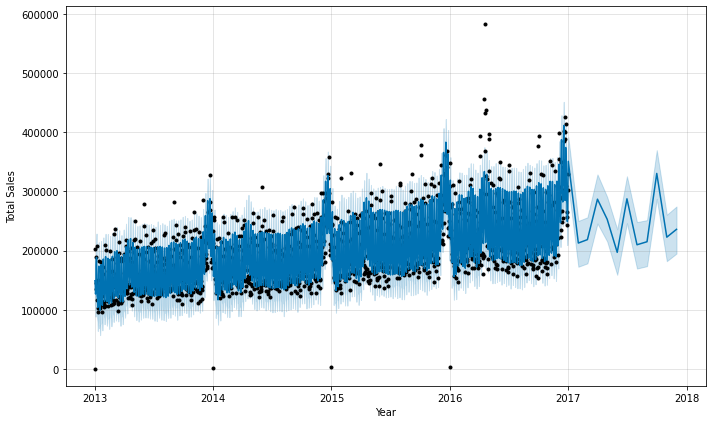

In [29]:
model_family['GROCERY I'].plot(forecast_future, xlabel='Year', ylabel='Total Sales');

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/root/

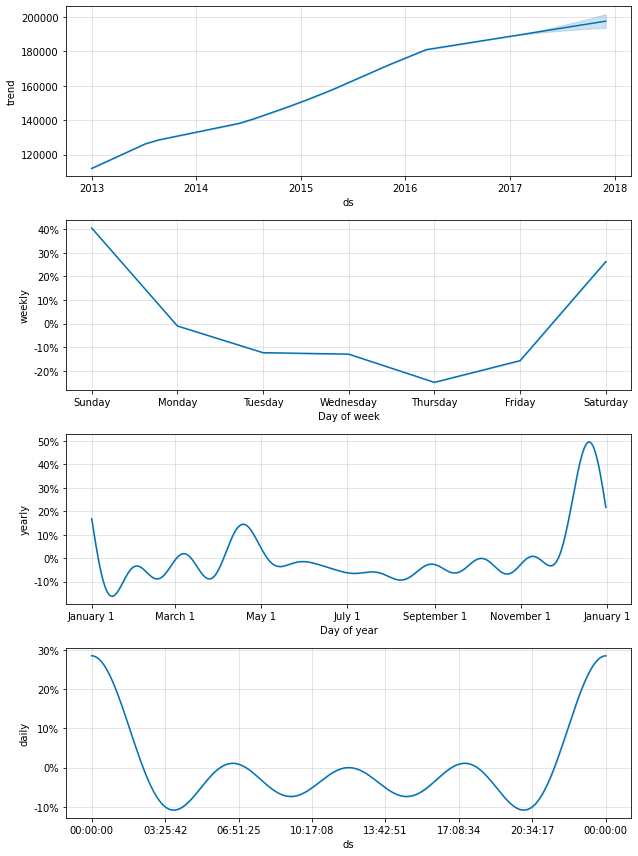

In [24]:
model_family['GROCERY I'].plot_components(fcst=forecast_future);

# Creating the model for Store

## Creating the model

In [11]:
sales_and_stores

,ds,store_nbr,family,y
0,2013-01-01,1,AUTOMOTIVE,0.000
1,2013-01-01,1,BABY CARE,0.000
2,2013-01-01,1,BEAUTY,0.000
3,2013-01-01,1,BEVERAGES,0.000
4,2013-01-01,1,BOOKS,0.000
...,...,...,...,...
2596369,2016-12-31,9,POULTRY,687.853
2596370,2016-12-31,9,PREPARED FOODS,100.405
2596371,2016-12-31,9,PRODUCE,3091.356
2596372,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000


In [12]:
%%time
def store(sales_and_stores):

    forecasts = {}
    for store in sales_and_stores['store_nbr'].unique():
        
        print(store)
        
        # creating a new variable
        tmp_df_prep = sales_and_stores[sales_and_stores['store_nbr']== store]
        
        # Transforming the column in date time
        tmp_df_prep['ds'] = pd.to_datetime(tmp_df_prep['ds'])
 
        # creating a temporary df to the the training and prediction
        tmp_df = tmp_df_prep.groupby(by='ds').sum().reset_index()
        
        
        # defining the train/test 
        train = tmp_df.iloc[:1457]
        test = tmp_df.iloc[1458:]
        
        
        # Instantiating the FB Prophet model
        model = Prophet(seasonality_mode='multiplicative')

        # fitting the model on the train test
        model.fit(train)
        
        forecasts[store]= model
    
    return forecasts

model_store = store(sales_and_stores)


<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1
Initial log joint probability = -26.23


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2948.44     0.0185729       144.056           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       2949.31   0.000227953       101.075   2.863e-06       0.001      173  LS failed, Hessian reset 
     199       2950.21     0.0046252         62.69      0.3181           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       2950.64    0.00196353       142.748   2.499e-05       0.001      359  LS failed, Hessian reset 
     299       2951.33    0.00670235       68.9742           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2951.62   0.000139393       73.1952           1           1      584   
    Iter      log prob        ||dx||      ||grad||       al

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3634.89    0.00107443       124.238           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147        3635.8   0.000106154       127.387   8.932e-07       0.001      237  LS failed, Hessian reset 
     199       3636.09   0.000305145       61.0685      0.9143      0.9143      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       3636.21   7.01788e-05        82.886   6.413e-07       0.001      371  LS failed, Hessian reset 
     299       3636.39   4.05078e-05       74.9833      0.3834           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       3636.52   0.000239321       192.389   2.625e-06       0.001      569  LS failed, Hessian reset 
     393       3636.56   5.77156e-0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -26.815
12
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2878.38    0.00224485       99.1235      0.9692      0.9692      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       2879.26   3.71695e-05       98.5764   4.919e-07       0.001      301  LS failed, Hessian reset 
     199       2879.27   1.65655e-05       79.9906      0.7388      0.7388      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       2879.27   1.19162e-07       75.3285      0.2134      0.6483      361   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -16.4949
13
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2948.8     0.0107952        302.77           1     

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ls  Notes 
     723       2959.18   5.95206e-05       76.9021   7.534e-07       0.001     1180  LS failed, Hessian reset 
     799       2959.23   1.80173e-05       80.4332       5.299      0.5299     1279   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     899       2959.82   1.39399e-05       66.3176      0.2973      0.2973     1400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     928       2959.83   1.14698e-05       67.9129   1.704e-07       0.001     1482  LS failed, Hessian reset 
     977       2959.84   1.80943e-07       64.6774      0.0566           1     1545   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -24.6924


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3060.93    0.00251567       233.149           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     193       3063.32    0.00142713       166.348   1.402e-05       0.001      284  LS failed, Hessian reset 
     199       3063.42   0.000535167       108.749      0.4256           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3063.66    0.00153697       94.9333           1           1      417   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       3063.74   0.000181278       94.9874   2.027e-06       0.001      478  LS failed, Hessian reset 
     355       3063.78   1.00743e-05       84.4963   1.235e-07       0.001      573  LS failed, Hessian reset 
     372       3063.78   1.15998e-0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


15
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2797.56    0.00143315       137.613      0.5381      0.5381      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       2799.18   0.000449593       148.876   2.807e-06       0.001      206  LS failed, Hessian reset 
     196       2800.32    0.00200885       276.897   1.737e-05       0.001      321  LS failed, Hessian reset 
     199       2800.39   0.000394794       79.6629           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       2800.67   0.000271975       84.2288   3.324e-06       0.001      454  LS failed, Hessian reset 
     299       2800.69   3.70848e-05       72.8324           1           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318        2800.7   2.57073e-0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -22.8523
16
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3191    0.00679696       126.191      0.8369      0.8369      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3193.11    0.00133719       104.138      0.5028           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       3193.29    0.00135294       172.365   1.198e-05       0.001      320  LS failed, Hessian reset 
     234       3193.36   0.000257955       68.4327   3.368e-06       0.001      375  LS failed, Hessian reset 
     299       3193.38    2.9574e-06       67.1157           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338        3193.4   9.72193e-05       79.7752   1.083e-06       0.001      561  LS failed, Hessian r

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3005.67   0.000210983       72.6701           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       3007.25    0.00271163       248.631   2.517e-05       0.001      215  LS failed, Hessian reset 
     199       3007.62   0.000414183       68.4494      0.7216      0.7216      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       3008.12   0.000549829       194.904   5.415e-06       0.001      382  LS failed, Hessian reset 
     299       3008.44   5.48652e-06       75.7592      0.8792      0.8792      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       3008.45   3.41671e-05       81.1595   4.264e-07       0.001      513  LS failed, Hessian reset 
     339       3008.45   4.53844e-0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3293.02     0.0188092       311.436           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       3296.02   0.000178468       117.134   1.293e-06       0.001      234  LS failed, Hessian reset 
     199       3296.29   0.000565511       92.2124           1           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218        3296.5    0.00235367       139.354   2.804e-05       0.001      345  LS failed, Hessian reset 
     269       3296.73   7.75314e-05       81.2054   9.423e-07       0.001      451  LS failed, Hessian reset 
     299       3296.74   1.53948e-07        67.058      0.2672      0.2672      489   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       3296.74   6.39384e-0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          2722    0.00369246       106.529      0.4083           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2729.84    0.00388412       80.7225      0.5612      0.5612      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2731.53    0.00527671       111.733           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       2731.63    0.00225374       115.873   2.208e-05       0.001      415  LS failed, Hessian reset 
     399       2732.52   1.09353e-06       75.0633      0.2668           1      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       2732.53   5.61342e-05       79.3814   6.021e-07       0.001    

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3343.69   0.000863795       99.7662      0.8654      0.8654      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       3348.64   0.000194168       131.078   2.629e-06       0.001      270  LS failed, Hessian reset 
     199       3348.79   0.000632527       64.4747      0.1984           1      286   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3348.96   0.000373719       107.836   5.179e-06       0.001      358  LS failed, Hessian reset 
     299          3349   9.86986e-05       77.5341           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3349.01   1.10614e-06        70.756      0.2549      0.9321      582   
    Iter      log prob        ||dx||      ||grad||       alp

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

Initial log joint probability = -4.1474
21
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4175.45    0.00398509       509.106           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     178       4179.73   0.000106033       180.308   1.282e-06       0.001      271  LS failed, Hessian reset 
     199       4179.86   0.000304243       86.0798           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       4180.41   4.45302e-05       94.8534   2.955e-07       0.001      388  LS failed, Hessian reset 
     299       4181.47   0.000162181       64.2775      0.6047      0.6047      477   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       4181.65    0.00013346       216.975   1.318e-06       0.001      541  LS failed, Hessian re

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -28.2806
22
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3083.95     0.0228855       691.321       0.264           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3147.58    0.00523256       333.288       0.432      0.9323      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3171.94     0.0100301       183.576      0.3388           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       3177.81   0.000329127        205.64   3.002e-06       0.001      514  LS failed, Hessian reset 
     399       3178.33   0.000362611       86.7675           1           1      533   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     438       3178.45   0.000185757 

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3542.41    0.00842834        157.63           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3566.8    0.00131995       186.096      0.3797      0.3797      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3574.31   0.000142911       155.813   7.567e-07       0.001      437  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3578.19    0.00232327       63.1392           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     472       3578.43   1.58612e-07       83.1465      0.6139           1      662   
Optimization terminated normally: 
  Convergence detected: relative gradient magn

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2873.35    0.00197129       202.879           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2881.74   0.000441813       62.4004           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2881.84   1.27692e-05       65.0535           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       2881.91   0.000282034       92.6753   3.332e-06       0.001      502  LS failed, Hessian reset 
     399       2881.94   8.24754e-07       70.3516      0.2298    0.002298      569   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     428       2881.94   1.11488e-07       69.6832     0.03091           1    

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3097.23     0.0100649       219.825           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3111.49   0.000493614       59.0035           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3119.54   0.000455782       90.7374      0.8943      0.8943      355   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        3121.8     0.0027267       131.519           1           1      478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3132.96      0.015608       101.947      0.7267      0.7267      595   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     508  

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -112.35
26
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      86       2770.04    0.00326933       162.842       3e-05       0.001      157  LS failed, Hessian reset 
      99       2770.81    0.00203163       105.156      0.4405           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       2773.13   0.000346117       123.508   2.527e-06       0.001      273  LS failed, Hessian reset 
     199       2774.26   8.69294e-06       65.4088      0.9203      0.9203      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       2775.18   0.000489092       154.056   4.347e-06       0.001      485  LS failed, Hessian reset 
     299       2775.86   0.000174044        55.067       0.417           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  No

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
Error evaluating model log probability: Non-finite gradient.

      99       3792.64   7.06542e-05       84.1444      0.1285      0.5314      148   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3794.74   6.94313e-05        89.237           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     292       3795.59   9.51309e-05       132.782   4.989e-07       0.001      466  LS failed, Hessian reset 
     299       3795.77     0.0012193       93.4734      0.7939      0.7939      475   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3795.98   1.61696e-06        80.448      0.5637      0.5637      595   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     408       3

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3581.64    0.00548244       71.3729           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3587.92    0.00011205       95.2394   6.385e-07       0.001      309  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234        3588.3   0.000222589       155.207   3.362e-06       0.001      384  LS failed, Hessian reset 
     266       3588.35   3.81568e-05       84.9424   6.043e-07       0.001      459  LS failed, Hessian reset 
     298       3588.36   1.80451e-05       75.4267   2.242e-07       0.001      542  LS failed, Hessian reset 
     299       3588.36   8.05294e-06       65.2756           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     332   

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.0435
29
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3246.87   0.000445095       67.1001           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     118       3247.38   0.000232283       81.5483    8.42e-07       0.001      190  LS failed, Hessian reset 
     170       3247.84   0.000777009       290.385   7.893e-06       0.001      297  LS failed, Hessian reset 
     199       3248.11   0.000288413       51.6103           1           1      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       3248.34   0.000143532       110.414    1.56e-06       0.001      496  LS failed, Hessian reset 
     299       3248.42   0.000234395       69.0137           1           1      511   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3444.31     0.0729391       395.214       1.104     0.01104      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3467.58   0.000754092       177.548      0.1305      0.7728      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3477.52    0.00211335       215.591           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       3479.45   0.000147665       96.9489    5.88e-07       0.001      457  LS failed, Hessian reset 
     399        3481.1    0.00174767       79.1287           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3483.08    0.00430452       82.5118      0.1636      0.9471     

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -24.7174
30
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2931.67      0.001766        114.88      0.4998           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     120       2932.85   0.000245259       101.007   3.031e-06       0.001      201  LS failed, Hessian reset 
     177       2934.33   0.000212048       88.7935   2.883e-06       0.001      312  LS failed, Hessian reset 
     199        2934.8   0.000825309       88.5521           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     260        2935.5    0.00139471       198.396   1.901e-05       0.001      450  LS failed, Hessian reset 
     299       2936.14   0.000339395       67.1548        0.97        0.97      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3433.81      0.018631       276.728       0.276           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       3436.56   0.000123725       78.0672   7.371e-07       0.001      243  LS failed, Hessian reset 
     199       3437.06    0.00187416       82.6766       0.409           1      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       3437.12   0.000274765       157.769   3.921e-06       0.001      366  LS failed, Hessian reset 
     255       3437.16   0.000100953       63.4389   1.284e-06       0.001      451  LS failed, Hessian reset 
     282       3437.17   8.29979e-08       56.8808      0.2178      0.2178      488   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint pro

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3795.09     0.0013172       81.5902      0.4915      0.4915      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       3798.12   6.54033e-05       82.9497   1.071e-06       0.001      256  LS failed, Hessian reset 
     199       3798.46     0.0012688       91.4031       3.862      0.3862      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       3798.96   7.70069e-05        78.957   4.491e-07       0.001      395  LS failed, Hessian reset 
     268       3799.35   0.000233425       125.304   2.487e-06       0.001      499  LS failed, Hessian reset 
     299       3799.36   7.96814e-07       64.2107      0.6366      0.6366      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     324       3799.36   4.11768e-0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2962.48    0.00230898       108.716      0.8726      0.8726      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       2964.29   0.000316137       119.379   1.686e-06       0.001      214  LS failed, Hessian reset 
     199       2966.86   0.000239207       85.1397           1           1      278   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2970.17   9.34397e-06       80.2241      0.5566      0.5566      395   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     328       2970.19   2.37841e-05       87.4723   2.645e-07       0.001      464  LS failed, Hessian reset 
     350       2970.19   1.28414e-07       80.9286       0.294           1      496   
Optimization terminated normally: 
  Convergence detected: 

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -47.3036
34
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2976.97    0.00197144       348.274     0.06741           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       2979.03   0.000415162       176.732   2.513e-06       0.001      203  LS failed, Hessian reset 
     199       2980.93    0.00252686       104.461      0.4435      0.4435      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       2980.99   0.000364314       141.998   5.375e-06       0.001      320  LS failed, Hessian reset 
     213       2981.04   6.47083e-05       56.1399   1.177e-06       0.001      372  LS failed, Hessian reset 
     271       2981.06   2.06495e-05       63.1566    2.83e-07       0.001      491  LS failed, Hessian reset 
     299       2981.06   5.45464e-06        84.008           1

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -19.4799
35
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3366.76   7.86004e-05       75.9978      0.1273      0.1273      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3367.24   0.000239838       85.0246       3.715      0.3715      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3367.26   7.43597e-05       82.0884    1.01e-06       0.001      317  LS failed, Hessian reset 
     264       3367.28   3.59934e-07       64.0683           1           1      384   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -5.91822


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4004.71    0.00031222       127.207      0.5722           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4005.78   9.00756e-05       81.9962           1           1      268   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     287       4005.85   6.03718e-06       64.9278   6.455e-08       0.001      432  LS failed, Hessian reset 
     299       4005.85   1.43781e-06       66.4292      0.9034      0.9034      446   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       4005.85     7.984e-08        71.788      0.2768      0.2768      457   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -34.1281
37
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2762.43    0.00856313       97.1255           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2769.09    0.00252675       78.7035           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       2769.37   0.000388323       129.324   4.483e-06       0.001      334  LS failed, Hessian reset 
     299       2769.65    0.00177024       81.1962           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2769.75   9.86214e-06       78.6313      0.3831           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     406       2769.75   1.77183e-06 

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


38
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2698.25   5.68086e-05        63.136     0.01626           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     135       2698.53   0.000519645       133.746   5.469e-06       0.001      219  LS failed, Hessian reset 
     199       2698.69    0.00032441       86.2736      0.3012           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     232       2699.58   0.000489072       123.901   3.988e-06       0.001      378  LS failed, Hessian reset 
     270       2700.02    0.00045636       69.9342   9.314e-06       0.001      451  LS failed, Hessian reset 
     299       2700.05   2.51864e-05       66.1355           1           1      491   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       2700.05   3.61981e-0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -32.457
39
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2823.46    0.00186178       119.718   2.264e-05       0.001      153  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       2823.99   0.000269555       90.3493   1.781e-06       0.001      295  LS failed, Hessian reset 
     199       2824.47   0.000295633       69.2128           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2824.51   7.40307e-05       72.5767   1.074e-06       0.001      416  LS failed, Hessian reset 
     299       2824.54   4.83294e-06       44.7123           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       2824.54   9.88383e-05        78.159   1.393e-06       0.001      54

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     47.1561      0.0814           1      628   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -26.108
40
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       2940.98   0.000429597       143.394   5.763e-06       0.001      152  LS failed, Hessian reset 
      99       2941.53    0.00180554       60.8084           1           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2943.72    0.00102988       86.8822      0.3784      0.3784      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211          2944   0.000244745       97.3602   1.443e-06       0.001      350  LS failed, Hessian reset 
     259       2944.42   0.000296301       65.5303   4.209e-06       0.001      451  LS failed, Hessian reset 
     299       2944.46    0.00143066       58.3779           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  No

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

Initial log joint probability = -18.3642
42
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3251.6     0.0048219       203.215           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       3253.71   0.000376529       180.737   4.052e-06       0.001      259  LS failed, Hessian reset 
     199       3254.49   0.000161389       78.6456       0.228           1      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       3254.53   0.000413063       101.056   6.297e-06       0.001      367  LS failed, Hessian reset 
     277       3254.55   2.44658e-05       82.3739   3.056e-07       0.001      493  LS failed, Hessian reset 
     299       3254.55   6.75212e-07       70.3801       1.142       0.439      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


43
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2836.33     0.0505744       265.253      0.1103           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2874.81    0.00589713       229.378           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2882.44    0.00358304       165.187   2.925e-05       0.001      357  LS failed, Hessian reset 
     299       2885.68    0.00625719         157.2           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326        2890.4   0.000444367       183.033   3.875e-06       0.001      482  LS failed, Hessian reset 
     399       2897.79    0.00277996       93.6749           1           1      574   
    Iter      log prob        ||dx||      ||grad||       al

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -53.1211
44
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3051.3   0.000452164       138.983       0.315       0.315      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3056.61   0.000181918       72.0335           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3056.9   0.000120204        83.615      0.6602      0.6602      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       3056.94   3.15383e-05       90.8003   4.197e-07       0.001      460  LS failed, Hessian reset 
     399       3057.02   2.19908e-05       58.2879           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       3057.02   1.27875e-05 

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2859.67    0.00337807        96.102           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2861.93   0.000983638       60.6152           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       2862.55     0.0002775       112.614   1.837e-06       0.001      339  LS failed, Hessian reset 
     288        2863.2   1.83903e-05       54.4954   3.369e-07       0.001      439  LS failed, Hessian reset 
     299        2863.2   3.66208e-06       68.6347      0.2146      0.2146      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       2863.28   0.000152643       53.8854   1.913e-06       0.001      568  LS failed, Hessian reset 
     399       2863.34    0.00025401  

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


46
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3396.28    0.00611094       220.418       0.783       0.783      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       3399.07   0.000104818       84.9537   1.298e-06       0.001      277  LS failed, Hessian reset 
     199       3399.18   0.000265235       47.2447      0.1874           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3399.23   0.000111056        103.92   1.426e-06       0.001      360  LS failed, Hessian reset 
     231       3399.31   0.000113012       73.5851   2.858e-06       0.001      416  LS failed, Hessian reset 
     262        3399.4   0.000746176       90.7921   1.198e-05       0.001      498  LS failed, Hessian reset 
     299       3399.47   0.000422601       54.9394           1           1      546   
    Iter      lo

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

Initial log joint probability = -28.6404
48
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2926.76     0.0166894       191.344           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       2927.98    0.00231928       102.589   4.034e-05       0.001      215  LS failed, Hessian reset 
     199        2928.2   0.000385447       68.8926      0.8757      0.8757      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2928.73   1.12827e-05       72.2688           1           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       2929.13   0.000926691       108.058    1.63e-05       0.001      553  LS failed, Hessian reset 
     399       2929.35   0.000327718       66.0569           1           1      596   
    Iter      log 

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2922.5   0.000313986        99.583      0.1463      0.1463      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       2922.78    5.9757e-05       62.3174   9.187e-07       0.001      221  LS failed, Hessian reset 
     174        2922.8   8.29542e-05       65.3215   9.945e-07       0.001      316  LS failed, Hessian reset 
     194       2922.81   2.64701e-06       61.2217   5.715e-08       0.001      384  LS failed, Hessian reset 
     199       2922.81   4.89246e-07       41.9101      0.7144      0.7144      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       2922.81   1.44953e-08       45.9824     0.06691           1      406   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
49


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -18.3313
5
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2939.71     0.0108171       108.192      0.4514      0.4514      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2942.3   0.000400333       72.2993      0.5428      0.5428      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       2942.63   0.000249136       101.392   1.819e-06       0.001      304  LS failed, Hessian reset 
     274          2943   0.000153819       74.0426   1.795e-06       0.001      427  LS failed, Hessian reset 
     299       2943.02   0.000160364         63.31           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       2943.06   2.41036e-05       79.4094   3.564e-07       0.001      579  LS failed, Hessian re

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -30.4939
50
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3038.67    0.00154949        83.225      0.4406      0.4406      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       3040.35   0.000381465       91.2867   1.147e-06       0.001      209  LS failed, Hessian reset 
     199       3041.64   2.95787e-05       82.9972      0.6018      0.6018      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3041.81   0.000554775       191.067   5.095e-06       0.001      370  LS failed, Hessian reset 
     299       3041.93   3.97213e-06        70.951       0.551       0.551      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       3041.94   3.06641e-05       65.2528   4.095e-07       0.001      520  LS failed, Hessian r

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


51
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       3041.69   0.000246343        118.28   2.155e-06       0.001      148  LS failed, Hessian reset 
      99       3042.79    0.00113773       78.9894      0.2975      0.8882      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       3044.22   0.000568661       233.174   3.408e-06       0.001      272  LS failed, Hessian reset 
     199       3044.71   6.55059e-06       57.5201      0.3518      0.3518      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3044.71   4.02367e-06       67.4679   7.332e-08       0.001      421  LS failed, Hessian reset 
     251       3044.71   1.51958e-07       67.8546      0.2594      0.2594      446   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

Initial log joint probability = -28.6711
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       2813.38   0.000321304       107.795   2.833e-06       0.001      144  LS failed, Hessian reset 
      99       2813.92   7.90403e-05       54.1492           1           1      180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122        2814.2   0.000224406       73.6986   2.055e-06       0.001      252  LS failed, Hessian reset 
     199        2814.7   5.49364e-05       58.3852      0.3671      0.3671      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       2814.78    3.6809e-07       51.7767           1           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
52
53


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -60.6334
54
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3148.9    0.00194424       224.899      0.2537      0.2537      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3173.27     0.0174053       246.761       5.096      0.5096      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       3174.55   0.000149806       105.288   1.257e-06       0.001      330  LS failed, Hessian reset 
     299        3176.7    0.00616204       87.4399           1           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       3178.38   0.000489669       199.651   5.401e-06       0.001      511  LS failed, Hessian reset 
     399       3178.93   0.000153342       74.4356      0.2786           1      602   
    Iter      log 

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

Initial log joint probability = -23.7664
7
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3102    0.00400701       168.294      0.1206      0.8132      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       3104.73   0.000200417        77.424   1.062e-06       0.001      228  LS failed, Hessian reset 
     199       3105.61   0.000367104       50.2269           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       3105.96    0.00035497       139.022   6.286e-06       0.001      373  LS failed, Hessian reset 
     275       3106.15   7.77217e-05       66.0245   9.988e-07       0.001      481  LS failed, Hessian reset 
     285       3106.16   1.27356e-05       63.2734   2.166e-07       0.001      531  LS failed, Hessian reset 
     299       3106.16   5.11476e-06       55.3533      0.4437 

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2928.82   0.000741318       87.3668           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2935.96   0.000504111       66.6514           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       2936.09   0.000187449       80.8429   1.991e-06       0.001      315  LS failed, Hessian reset 
     289       2936.65   0.000319844       124.681   4.115e-06       0.001      462  LS failed, Hessian reset 
     299       2936.93   0.000474439        70.055      0.9288      0.9288      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       2937.05   8.26346e-05       73.4278   1.247e-06       0.001      567  LS failed, Hessian reset 
     399       2937.06   1.22418e-05

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2870.43    0.00269025       57.8249           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       2871.78   0.000675695       204.085   7.269e-06       0.001      207  LS failed, Hessian reset 
     199       2873.42   0.000252428       70.9671      0.3516      0.3516      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       2873.73    0.00458446       219.254   9.244e-05       0.001      371  LS failed, Hessian reset 
     261          2874   0.000225156       102.929   3.373e-06       0.001      453  LS failed, Hessian reset 
     299       2874.04   0.000111745       77.7327           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     317       2874.29   0.000599796  

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


CPU times: user 26.5 s, sys: 2.17 s, total: 28.6 s
Wall time: 28.2 s
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2940.22    0.00231741        107.51           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       2940.52   0.000216086       86.0131   1.809e-06       0.001      180  LS failed, Hessian reset 
     199       2942.43   2.36482e-05       81.5199           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2942.58   5.74601e-07       69.8324     0.08375           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2942.61   1.76073e-06       74.2038       1.447      0.1447      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     413    

In [13]:
model_store

{1: <fbprophet.forecaster.Prophet at 0x7f90eff6fc40>,
 10: <fbprophet.forecaster.Prophet at 0x7f90eff74f70>,
 11: <fbprophet.forecaster.Prophet at 0x7f90eff846d0>,
 12: <fbprophet.forecaster.Prophet at 0x7f90eff89910>,
 13: <fbprophet.forecaster.Prophet at 0x7f90eff909d0>,
 14: <fbprophet.forecaster.Prophet at 0x7f90eff94730>,
 15: <fbprophet.forecaster.Prophet at 0x7f90eff1ba30>,
 16: <fbprophet.forecaster.Prophet at 0x7f90eff20040>,
 17: <fbprophet.forecaster.Prophet at 0x7f90eff26850>,
 18: <fbprophet.forecaster.Prophet at 0x7f90ee47e430>,
 19: <fbprophet.forecaster.Prophet at 0x7f90ee482640>,
 2: <fbprophet.forecaster.Prophet at 0x7f90ee40c430>,
 20: <fbprophet.forecaster.Prophet at 0x7f90ee415310>,
 21: <fbprophet.forecaster.Prophet at 0x7f90ee47e820>,
 22: <fbprophet.forecaster.Prophet at 0x7f90ee4191c0>,
 23: <fbprophet.forecaster.Prophet at 0x7f90ee4153a0>,
 24: <fbprophet.forecaster.Prophet at 0x7f90ee42bb20>,
 25: <fbprophet.forecaster.Prophet at 0x7f90ee40e7c0>,
 26: <fbprop

## Making prediction with a specific family

In [14]:
future_store = model_store[9].make_future_dataframe(periods=12, freq='MS')  #period of 12 months
forecast_future_store = model_store[9].predict(future_store)
forecast_future_store.head()


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,9916.932754,6450.762046,14845.441259,9916.932754,9916.932754,0.053771,0.053771,0.053771,-0.055231,-0.055231,-0.055231,0.109002,0.109002,0.109002,0.0,0.0,0.0,10450.179637
1,2013-01-02,9924.395371,4800.949183,13497.730482,9924.395371,9924.395371,-0.085812,-0.085812,-0.085812,-0.173717,-0.173717,-0.173717,0.087906,0.087906,0.087906,0.0,0.0,0.0,9072.767830
2,2013-01-03,9931.857988,4746.076011,13282.227449,9931.857988,9931.857988,-0.101136,-0.101136,-0.101136,-0.168332,-0.168332,-0.168332,0.067196,0.067196,0.067196,0.0,0.0,0.0,8927.386480
3,2013-01-04,9939.320605,3555.268466,12343.324848,9939.320605,9939.320605,-0.198427,-0.198427,-0.198427,-0.245607,-0.245607,-0.245607,0.047179,0.047179,0.047179,0.0,0.0,0.0,7967.086892
4,2013-01-05,9946.783222,7951.398210,16726.978071,9946.783222,9946.783222,0.251946,0.251946,0.251946,0.223809,0.223809,0.223809,0.028138,0.028138,0.028138,0.0,0.0,0.0,12452.839634


## Plotting the specific store prediction

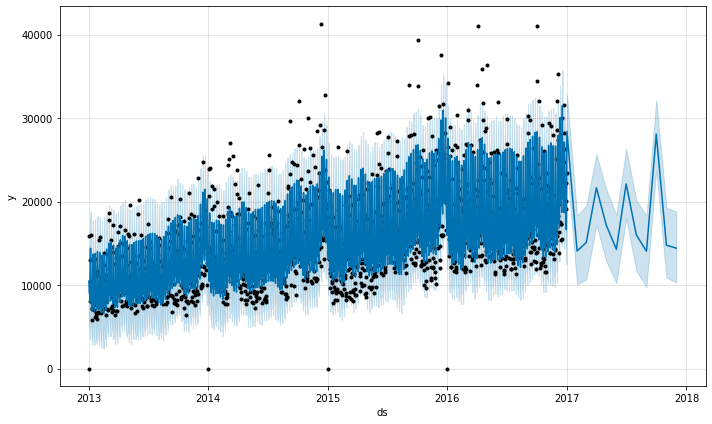

In [25]:
model_store[9].plot(forecast_future_store);

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


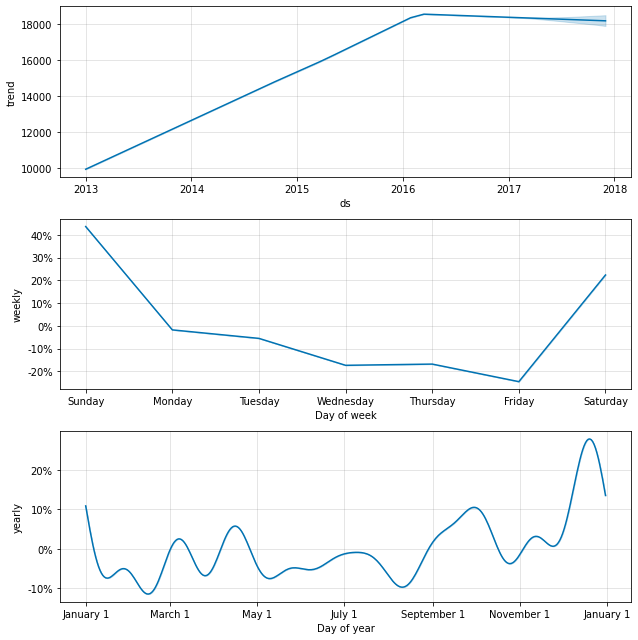

In [18]:
model_store[9].plot_components(fcst=forecast_future_store);

In [ ]:
future_family = st.session_state.model_family[family_prediction_selection].make_future_dataframe(periods=12, freq='MS')  #period of 12 months
        forecast_future_family = st.session_state.model_family[family_prediction_selection].predict(future_family)
        forecast_future_family.head()

        fig = st.session_state.model_family[family_prediction_selection].plot(forecast_future_family)
        st.write(fig)

        fig = st.session_state.model_family[family_prediction_selection].plot_components(fcst=forecast_future_family)
        st.write(fig)

# Auxiliar graphs and backup

In [17]:
plt.figure(figsize=(20,20))
for category in forecasts_df.columns:
    plt.plot(forecasts_df[category], label=category)
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1))

NameError: name 'forecasts_df' is not defined

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,20))
for category in forecasts_df.columns:
    if category in ('AUTOMOTIVE', 'GROCERY I', 'BEVERAGES', 'PRODUCE'):
        pass
    else:
        plt.plot(forecasts_df[category], label=category)
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1))

In [ ]:
"""BACKUP"""

# def family(sales_and_stores):

#     forecasts = {}
#     for category in sales_and_stores['family'].unique():
#         print(category)
#         # creating a new variable
#         tmp_df_prep = sales_and_stores[sales_and_stores['family']== category]
        
#         # Transforming the column in date time
#         tmp_df_prep['ds'] = pd.to_datetime(tmp_df_prep['ds'])
 
#         # creating a temporary df to the the training and prediction
#         tmp_df = tmp_df_prep.groupby(by='ds').sum().drop(columns=["store_nbr", "onpromotion"]).reset_index()
        
        
#         # defining the train/test 
#         train = tmp_df.iloc[:1457]
#         test = tmp_df.iloc[1458:]
        
        
#         # Instantiating the FB Prophet model
#         model = Prophet(seasonality_mode='multiplicative')

#         # fitting the model on the train test
#         model.fit(train)
        
# # CREATE A NEW FUNCTION TO SAVE 

#         # Making a prediction on the test set
#         forecast_test = model.predict(test)
#         forecast_test.head()

#         #plotting the test forecast
#         #model.plot(forecast_test)

#         # making a future prediction
#         future = model.make_future_dataframe(periods=12, freq='MS')  #period of 12 months
#         forecast_future = model.predict(future)
#         forecast_future.head()

#         # ploting the prediction
#         #model.plot(forecast_future)

#         # plotting the combination of analysis inside FB Prophet
#         #model.plot_components(fcst=forecast_future)

#         forecasts[category]= list(forecast_future['yhat'])
    
#     return forecasts

